# 07. Population
#### 인구 소멸 위기 지역:
- '한국의 '지방소멸'에 관한 7가지 분석' 보고서를 쓴 이상호 한국고용정보원 부연구위원의 분석 방법을 이용.
- 65세 이상 노인 인구와 20~39세 여성 인구를 비교해 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 '소멸 위험 지역'으로 분류하는 방식

#### 목표
   - 인구 소멸 위기 지역 파악
   - 인구 소멸 위기 지역의 지도 표현
   - 지도 표현에 대한 카르토그램 표현

#### Folium으로 그리기 위해서는 -> 각 시도별 경계선이 있는 json 파일이 필요
   - 오래된 데이터라 한계는 있지만
   - 서울을 대상으로 하는 것에는 문제가 없다
   - Lucy Park님의 자료
   - 출처: https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_municipalities_geo_simple.json
   - 문제가 하나 있는데 folium에서 사용하려면 고유한 아이디 역할을 하는 것이 있어야 한다
   - Lucy Park님에 의해 배포되는 자료에는 ID가 없다
   - 수기로 지역에 해당하는 id를 강사님이 데이터에 추가하셨다
   - Folium용 Json 파일에는 ID가 준비되었으니 인구현황 데이터에도 ID가 필요하다
   - 추후 Cartogram으로 그릴때도 ID를 동일하게 맞추면 좋겠다

- 혜식이라는 분의 블로그에서 해답을 얻음 
- 출처: http://openlook.org/wp/2016/12/

![hyesik](../data/hyesik.png)

- 이 글에서 영감을 받음
- 본인의 코드는 공개했지만 만들어진 코드의 원리는 공개하지 않았다
- 우리에게 맞게 사용하기 위해서는 노력이 필요하다
- ID 역할을 하는 것이 필요하다는 것을 알 수 있다
- 원본코드는 결과만 나와있어서 그 과정을 알 수 없으니 편집이 쉽지 않다
- 데이터를 정리하고 다시 봐야 될 것 같다
- 일단, 데이터를 확보 -> 인구 소멸 위기 지역을 계산 -> 각 지역별 고유 ID 부여 순서로 작업을 해야될 것 같다

- 인구 현황 데이터: ../data/07_population_raw_data.xlsx
- 출처: https://kosis.kr/index/index.do

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul

%matplotlib inline

Hangul OK in your Windows !!!


In [2]:
population = pd.read_excel('../data/07_population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace=True) # method='pad': 이전 데이터로 채워라
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


- 엑셀을 읽어보자

In [3]:
population.rename(
    columns={'행정구역(동읍면)별(1)': '광역시도', '행정구역(동읍면)별(2)': '시도', '계': '인구수'}, inplace=True
)
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


- 일부 컬럼 이름 변경

In [4]:
population = population[(population['시도'] != '소계')]
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


- 소계 제거!

In [5]:
population.is_copy = False

population.rename(columns={'항목': '구분'}, inplace=True)

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population.head()

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [6]:
population['20-39세'] = (
    population['20 - 24세']
    + population['25 - 29세']
    + population['30 - 34세']
    + population['35 - 39세']
)

population['65세이상'] = (
    population['65 - 69세']
    + population['70 - 74세']
    + population['75 - 79세']
    + population['80 - 84세']
    + population['85 - 89세']
    + population['90 - 94세']
    + population['95 - 99세']
    + population['100+']
)

population.head()

C:\Users\seonwook\AppData\Local\Temp/ipykernel_96768/3895455627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['20-39세'] = (
C:\Users\seonwook\AppData\Local\Temp/ipykernel_96768/3895455627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['65세이상'] = (


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


- 소멸지역을 조사하기 위한 데이터를 만들어두자

- 원하는 데이터만 가지고, 인덱스의 지역 구분도 해야한다
- 정리가 필요하다
- 데이터의 모양이 가로에 지역, 세로에 연령대별, 남여구분이 모두 위치하는 게 좋겠다
- pivot_table

In [7]:
pop = pd.pivot_table(
    population, index=['광역시도', '시도'], columns=['구분'], values=['인구수', '20-39세', '65세이상']
)
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [8]:
pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세이상', '합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

- 소멸 비율 계산
- 65세 이상 노인 인구와 20~39세 여성 인구를 비교해 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 '소멸 위험 지역'으로 분류하는 방식

In [9]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

- 소멸위기지역 : 소멸비율 < 1
- 소멸위기지역인지 확인할 수 있는 컬럼 추가

In [11]:
pop[(pop['소멸위기지역'] == True)].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

- 소멸위기지역 조회 -> 대부분 군 지역이다

In [15]:
tmp_columns = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))
]
pop.columns = tmp_columns
pop.head()

20-39세남자  20-39세여자  20-39세합계  65세이상남자  65세이상여자  65세이상합계     인구수남자  \
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   

             인구수여자     인구수합계      소멸비율  소멸위기지역  
광역시도 시도                                         
강원도  강릉시  107615.0  213846.0  1.226041   False  
     고성군   14215.0   30114.0  0.707314    True  
     동해시   46131.0   93297.0  1.289738   False  
     삼척시   34346.0   69599.0  0.973990    True  
     속초시   41505.0   81793.0  1.372647   False

In [16]:
pop.reset_index(inplace=True)
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


## 지도 시각화를 위한 지역별 ID 만들기

In [17]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [18]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

- 전국 규모의 ID를 어떻게 만들까

### 만들어야 할 ID를 아래와 같이 정해보자
    - 서울 중구
    - 서울 서초
    - 통영
    - 남양주
    - 포항 북구
    - 인천 남동
    - 안양 만안
    - 안양 동안
    - 안산 단원

#### 대한민국의 구 목록
- https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EA%B5%AC_%EB%AA%A9%EB%A1%9D

![gu](../data/gu.png)

In [19]:
si_name = [None] * len(pop)

tmp_gu_dict = {
    "수원": ["장안구", "권선구", "팔달구", "영통구"],
    "성남": ["수정구", "중원구", "분당구"],
    "안양": ["만안구", "동안구"],
    "안산": ["상록구", "단원구"],
    "고양": ["덕양구", "일산동구", "일산서구"],
    "용인": ["처인구", "기흥구", "수지구"],
    "청주": ["상당구", "서원구", "흥덕구", "청원구"],
    "천안": ["동남구", "서북구"],
    "전주": ["완산구", "덕진구"],
    "포항": ["남구", "북구"],
    "창원": ["의창구", "성산구", "진해구", "마산합포구", "마산회원구"],
    "부천": ["오정구", "원미구", "소사구"],
}

- 자치구는 자료에서 나타나므로, 행정구를 가진 지역만 신경쓰면 된다

In [20]:
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [21]:
pop['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [24]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [23]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        si_name[idx] = row['시도'][:-1]
        
    elif row['광역시도'] == '세종특별자치시':
        si_name[idx] = '세종'
    
    else:
        if len(row['시도']) == 2:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시도']
        else:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시도'][:-1]

- 여기서는 일반 시의 이름과 세종시, 그리고 광역시도의 일반 구를 정리한다
    - 강릉시 => 강릉
    - 춘천시 => 춘천
    - 세종시는 특별 예외처리
    - else 부분은
    - 중구 => 중구
    - 강남구 => 강남과 같이 정리한다

In [29]:
tmp_gu_dict.keys()

dict_keys(['수원', '성남', '안양', '안산', '고양', '용인', '청주', '천안', '전주', '포항', '창원', '부천'])

In [30]:
tmp_gu_dict.values()

dict_values([['장안구', '권선구', '팔달구', '영통구'], ['수정구', '중원구', '분당구'], ['만안구', '동안구'], ['상록구', '단원구'], ['덕양구', '일산동구', '일산서구'], ['처인구', '기흥구', '수지구'], ['상당구', '서원구', '흥덕구', '청원구'], ['동남구', '서북구'], ['완산구', '덕진구'], ['남구', '북구'], ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], ['오정구', '원미구', '소사구']])

In [25]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        for keys, values in tmp_gu_dict.items():
            if row['시도'] in values:
                if len(row['시도']) == 2:
                    si_name[idx] = keys + ' ' + row['시도']
                elif row['시도'] in ['마산합포구', '마산회원구']:
                    si_name[idx] = keys + ' ' + row['시도'][2:-1]
                else:
                    si_name[idx] = keys + ' ' + row['시도'][:-1]

- 행정구에 대해 특별히 다시 계산한다
    - 광역시나 특별시, 자치시가 아닌 경우의 행정구에 대해서만 적용한다
    - 행정구를 지정한 dict형 자료에 있는 지역인지 검색하고
    - 분당구 => 분당, 북구 => 북구
    - 특별히 너무 긴 이름의 구는 짧게 처리한다

In [32]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        if row['시도'][:-1] == '고성' and row['광역시도'] == '강원도':
            si_name[idx] = '고성(강원)'
        elif row['시도'][:-1] == '고성' and row['광역시도'] == '경상남도':
            si_name[idx] = '고성(경남)'

- 특별히 고성군에 대해 한 번 더 신경써준다

In [33]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [34]:
pop['ID'] = si_name

In [35]:
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [36]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


- 인구 소멸 위기 지역 파악도 끝내고,
- 지도에 그리기 위한 ID도 다 생성했다

## 카르토그램에 대해 고민하기

- 앞서 Carto-gram처럼 그리는 원본 코드는 혜식님의 코드라고 했다
- 문제는 혜식님의 코드는 결과만 있어서 그 시작 원리를 알 수 없다
- 더 큰 문제는 우리는 그 코드를 그대로 사용할 수도 없다
- 지역적 이슈도 있고, 원하는 형태가 살짝 바뀌었다
- 역추적을 해보자

#### 혜식님의 코드를 보고 고민하다 엑셀 + pivot_table이 떠올랐다

- 일단 엑셀로 먼저 그려보았다

In [38]:
draw_korea_raw = pd.read_excel('../data/07_draw_korea_raw.xlsx')
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


- 엑셀에서 그린 지도 파일을 읽어온다
- 데이터가 없는 칸들은 널값으로 처리되었다

In [39]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

- stack()는 pivot_table에 반대라고 생각하면 된다 데이터를 풀어버리는 역할
- 각 지역별 위치가 나타났다

In [40]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


- 인덱스로 나타난 좌표를 데이터로 사용하기 위해 reset_index() 사용하였다

In [41]:
draw_korea_raw_stacked.rename(
    columns={'level_0': 'y', 'level_1': 'x', 0: 'ID'}, inplace=True
)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


- 컬럼 이름을 좌표처럼 바꾸어주었다

In [42]:
draw_korea = draw_korea_raw_stacked

- 변수 이름을 깔끔하게

![cartomap](../data/cartomap.png)

- 이런 그림을 그려볼 것이다
- 경계선이 필요하다

In [43]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

- 수작업한 경계선

In [44]:
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
            
        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight='bold',
            fontsize=fontsize,
            ha='center',
            va='center',
            linespacing=linespacing,
        )

- 시도의 이름을 표현하는 함수

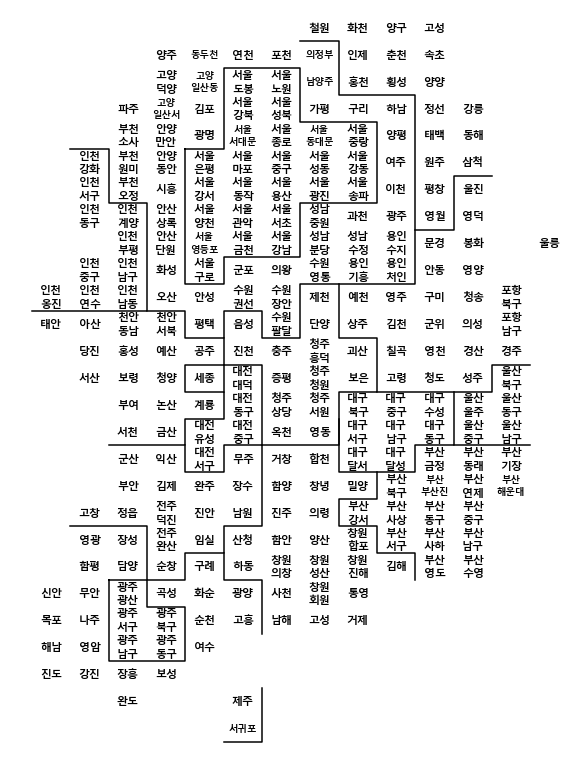

In [46]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8, 11))
    
    plot_text_simple(draw_korea)
    
    for path in BORDER_LINES:
        ys , xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)
        
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
simpleDraw(draw_korea)

- 간단히 경계선과 시도 이름만 먼저 그려보았다

In [47]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

- draw_korea의 모든 ID는 pop ID에 모두 포함되어 있다

In [48]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

- 빼는 순서를 바꾸었는데 결과가 다르게 나왔다
- 광역시가 아닌데 행정구를 가지고 있던 도시들이 pop['ID']에 남아있었다
- 차집합은 교환법칙이 성립하지 않는다
- 이미 행정구들에 대한 인구 정보들을 모두 가져왔기 때문에 남은 데이터는 필요가 없다
- 그래서 지워준다

In [49]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
    
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [50]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


- 지도를 그리기 위한 데이터와 인구현황 데이터를 합치자

In [51]:
def get_data_info(targetData, blockedMap):
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

- 그림을 그리기 위한 데이터를 계산하는 함수
- 이 함수는 색상을 만들때 최소값을 흰색으로 한다
- blockedMap은 인구현황이고, targetData는 그리고 싶은 컬럼

In [52]:
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )
    vmin, vmax = -tmp_max, tmp_max
    
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

- 그림을 그리기 위한 데이터를 계산하는 함수
- 이 함수는 색상을 만들때 중간값을 흰색으로 한다
- blockedMap은 인구현황이고, targetData는 그리고 싶은 컬럼

In [56]:
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        
        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight='bold',
            color=annocolor,
            fontsize=fontsize,
            ha='center',
            va='center',
            linespacing=linespacing
        )

In [66]:
def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    if zeroCenter:
        masked_mapdata, vmin, vmax, whitelabelmin = get_data_info_for_zero_center(
            targetData, blockedMap
        )
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(
            targetData, blockedMap
        )
        
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(
        masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa',
        linewidth=0.5,
    )
    
    plot_text(targetData, blockedMap, whitelabelmin)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
        
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb = plt.colorbar(shrink=0.1, aspect=10)
    cb.set_label(targetData)
    plt.tight_layout()
    plt.show()    

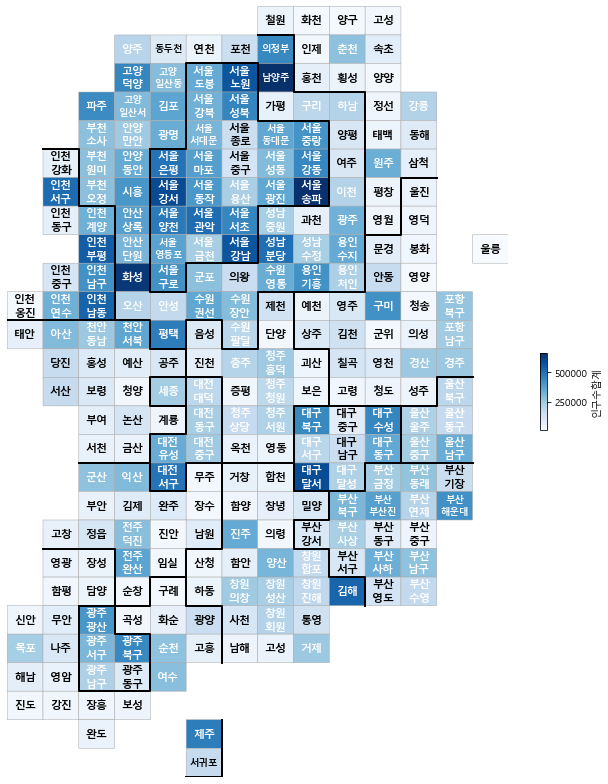

In [67]:
drawKorea('인구수합계', pop, 'Blues')

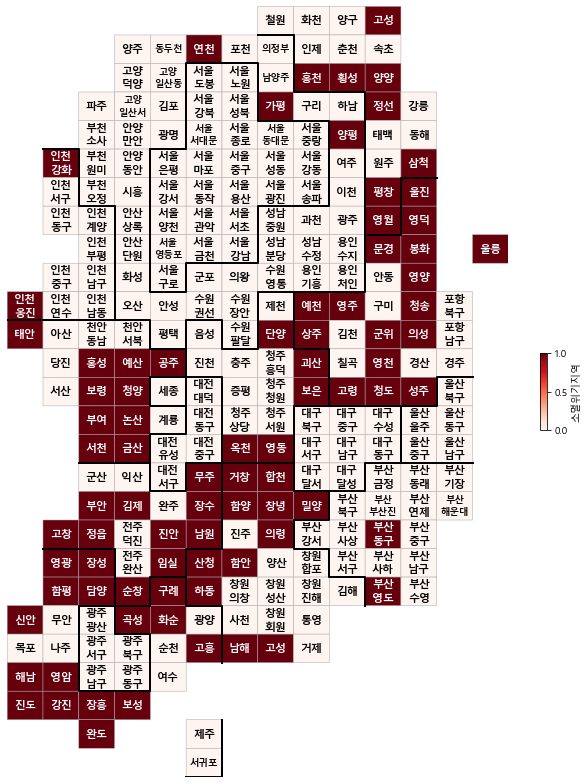

In [68]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

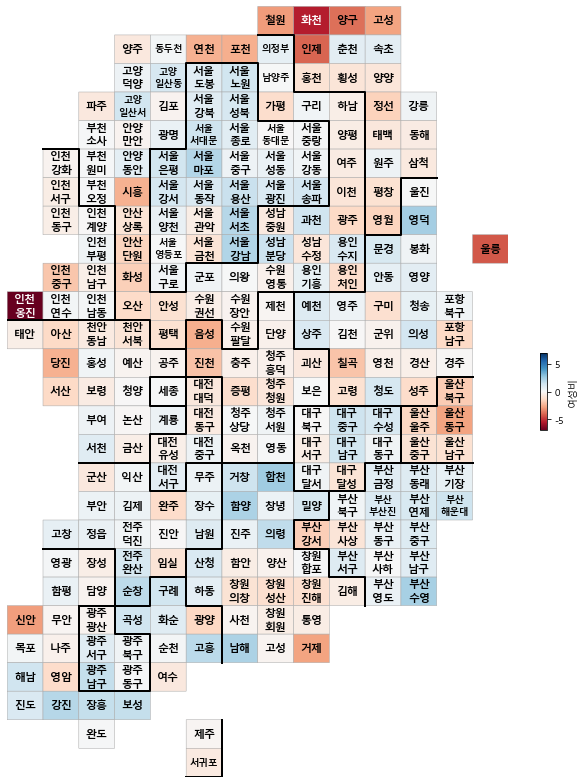

In [69]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수합계'] - 0.5) * 100
drawKorea('여성비', pop, 'RdBu', zeroCenter=True)

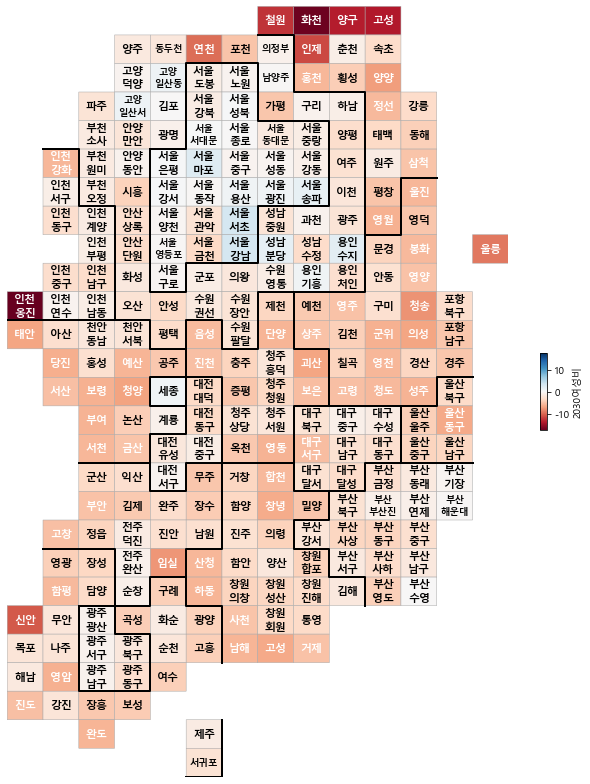

In [70]:
pop['2030여성비'] = (pop['20-39세여자'] / pop['20-39세합계'] - 0.5) * 100
drawKorea('2030여성비', pop, 'RdBu', zeroCenter=True)

In [71]:
import folium
import json

pop_folium = pop.set_index('ID') #json파일의 index도 ID로 되어있다
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [73]:
geo_path = '../data/07_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap.choropleth(
    geo_data=geo_str,
    data=pop_folium['인구수합계'],
    columns=[pop_folium.index, pop_folium['인구수합계']],
    fill_color='YlGnBu', # PuRd, YlGnBu
    key_on='feature.id',
)

mymap

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [74]:
mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap.choropleth(
    geo_data=geo_str,
    data=pop_folium['소멸위기지역'],
    columns=[pop_folium.index, pop_folium['소멸위기지역']],
    fill_color='PuRd', # PuRd, YlGnBu
    key_on='feature.id',
)

mymap

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
